<a href="https://colab.research.google.com/github/csabi0312/crypto-svm/blob/gru/crypto14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing packages

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
pip install ujson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
!pip install oandapyV20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
pip install v20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
pip install --upgrade git+https://github.com/yhilpisch/tpqoa.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/yhilpisch/tpqoa.git to /tmp/pip-req-build-3ypb7xm_
  Running command git clone --filter=blob:none --quiet https://github.com/yhilpisch/tpqoa.git /tmp/pip-req-build-3ypb7xm_
  Resolved https://github.com/yhilpisch/tpqoa.git to commit f47a1ffddd2b2684c7e1569df6210b98dbe4e701
  Preparing metadata (setup.py) ... done


In [29]:
import pickle
import gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from numpy import trapz
import pickle
import gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from numpy import trapz
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import keras.losses
import sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, average_precision_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras_tuner
import tpqoa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import load_model
import oandapyV20.endpoints.instruments as instruments
import datetime
import oandapyV20.endpoints.instruments as instruments
import datetime
from sklearn.metrics import mean_squared_error as mse

In [30]:
pip install rich

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
from rich.progress import track

# DATA

In [32]:
raw = pd.read_csv("/content/drive/MyDrive/Crypto/new3/full_spread_data.csv", parse_dates = ["time"], index_col = "time").dropna()
#raw["returns"] =np.log(raw.Close / raw.Close.shift(1))
raw.drop(["Open","Spread"],axis=1,inplace=True)
cols = []
for lag in range(1, 40):
    col_h = "h_lag{}".format(lag)
    col_l = "l_lag{}".format(lag)
    col_c = "c_lag{}".format(lag)
    col_v = "v_lag{}".format(lag)
    raw[col_h] = raw.High.shift(lag)
    cols.append(col_h)
    raw[col_l] = raw.Low.shift(lag)
    cols.append(col_l)
    raw[col_c] = raw.Close.shift(lag)
    cols.append(col_c)
    raw[col_v] = raw.Volume.shift(lag)
    cols.append(col_v)
    raw.dropna(inplace = True)
raw.drop(["High","Low","Volume"],axis=1,inplace=True)
raw

,Close,h_lag1,l_lag1,c_lag1,v_lag1,h_lag2,l_lag2,c_lag2,v_lag2,h_lag3,...,c_lag37,v_lag37,h_lag38,l_lag38,c_lag38,v_lag38,h_lag39,l_lag39,c_lag39,v_lag39
time,,,,,,,,,,,,,,,,,,,,,
2018-02-22 22:00:00+00:00,10441.6,10400.0,9601.5,9924.3,86014.0,10934.4,9738.6,9922.6,85916.0,11751.2,...,11590.0,85728.0,11805.4,9127.5,11371.0,86148.0,13905.9,10331.5,10713.0,85728.0
2018-02-23 22:00:00+00:00,9600.2,10520.4,9924.3,10441.6,25177.0,10400.0,9601.5,9924.3,86014.0,10934.4,...,11351.7,85961.0,12108.9,10675.7,11590.0,85728.0,11805.4,9127.5,11371.0,86148.0
2018-02-24 22:00:00+00:00,10369.8,9868.7,9291.1,9600.2,60419.0,10520.4,9924.3,10441.6,25177.0,10400.0,...,12904.4,85853.0,12014.3,11052.6,11351.7,85961.0,12108.9,10675.7,11590.0,85728.0
2018-02-25 22:00:00+00:00,10293.0,10434.4,9396.2,10369.8,85554.0,9868.7,9291.1,9600.2,60419.0,10520.4,...,11363.5,75479.0,13004.7,11243.7,12904.4,85853.0,12014.3,11052.6,11351.7,85961.0
2018-02-26 22:00:00+00:00,10890.0,10399.2,10114.4,10293.0,28880.0,10434.4,9396.2,10369.8,85554.0,9868.7,...,10358.4,85958.0,12961.8,11117.0,11363.5,75479.0,13004.7,11243.7,12904.4,85853.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-17 22:00:00+00:00,20939.4,21647.9,20407.7,20773.2,517432.0,21588.4,20860.6,21314.7,424610.0,21445.4,...,16194.6,291295.0,16617.2,16343.8,16505.0,205653.0,16784.7,16453.2,16541.2,244983.0
2023-01-18 22:00:00+00:00,22330.7,21195.0,20627.2,20939.4,399542.0,21647.9,20407.7,20773.2,517432.0,21588.4,...,16463.8,265767.0,16586.4,16003.0,16194.6,291295.0,16617.2,16343.8,16505.0,205653.0
2023-01-19 22:00:00+00:00,22999.8,22439.6,20865.0,22330.7,455144.0,21195.0,20627.2,20939.4,399542.0,21647.9,...,17103.6,252757.0,16528.6,16098.6,16463.8,265767.0,16586.4,16003.0,16194.6,291295.0


In [33]:
#felso=np.quantile(raw["returns"],0.66)
#also=np.quantile(raw["returns"],0.33)
#print(felso,also)
#returns2=(raw["returns"]>felso).astype(int)+2*(raw["returns"]<also).astype(int)
#raw["returns2"]=returns2
to=int(len(raw)*0.7)
X_train=raw.drop(["Close"],axis=1).iloc[:to].to_numpy()
y_train=raw["Close"].iloc[:to].to_numpy().astype(int)
X_test=raw.drop(["Close"],axis=1).iloc[to:].to_numpy()
y_test=raw["Close"].iloc[to:].to_numpy().astype(int)

scaler1=MinMaxScaler()
X_train=scaler1.fit_transform(X_train)
X_test=scaler1.transform(X_test)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(923, 156) (923,) (396, 156) (396,)


In [34]:
scaler1 = StandardScaler()
scaler2 = StandardScaler()
X_train=scaler1.fit_transform(X_train)
y_train=scaler2.fit_transform(y_train.reshape(-1,1)).flatten()
X_test=scaler1.transform(X_test)
y_test=scaler2.transform(y_test.reshape(-1,1)).flatten()
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(923, 156) (923,) (396, 156) (396,)


# GRU

In [37]:
def build_model(hp):
  model = Sequential()

  model.add(Dense(hp.Int('units', min_value=15, max_value=200, step=1),input_shape=(156,1),activation="relu"))
  model.add(Dropout(0.2))

  for j in range(hp.Int('units1', min_value=1, max_value=16, step=1)):
    model.add(Dense(hp.Int('units10'+"_"+str(j), min_value=10, max_value=200, step=1),activation="relu"))
    model.add(Dropout(0.2))

  for i in range(hp.Int('units2', min_value=1, max_value=16, step=1)):
    model.add(GRU(units=hp.Int('units20_'+str(i), min_value=8, max_value=120, step=1), return_sequences=True, activation='tanh'))

  model.add(GRU(units=hp.Int('units3', min_value=8, max_value=120, step=1), return_sequences=False, activation='tanh'))

  model.add(Dense(hp.Int('units4', min_value=8, max_value=200, step=1),input_shape=(156,1),activation="relu"))
  model.add(Dense(1))

  model.compile(loss='mean_squared_error', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])
  return model

In [38]:
tuner = keras_tuner.RandomSearch(
      build_model,
      objective='val_loss',
      max_trials=100,overwrite = True)
tuner.search(X_train,y_train , epochs=10, validation_split=0.2)
best_model = tuner.get_best_models()[0]
best_model.summary()

Trial 100 Complete [00h 00m 10s]
val_loss: 3.763310194015503

Best val_loss So Far: 1.5862631797790527
Total elapsed time: 00h 22m 47s
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 156, 112)          224       
                                                                 
 dropout (Dropout)           (None, 156, 112)          0         
                                                                 
 gru (GRU)                   (None, 156, 25)           10425     
                                                                 
 gru_1 (GRU)                 (None, 156, 52)           12324     
                                                                 
 gru_2 (GRU)                 (None, 156, 82)           33456     
                                                                 
 gru_3 (GRU)                 (None, 45)              

In [39]:
#best_model=build_best()
early_stopping=EarlyStopping(patience=100, verbose=0)
checkpointer=ModelCheckpoint(filepath='weights1.hdf5', save_best_only=True, verbose=1)
best_model.fit(X_train,y_train, batch_size=32,epochs=1000, verbose=0, \
                validation_split=0.1,callbacks=[checkpointer, early_stopping], shuffle=True)


Epoch 1: val_loss improved from inf to 2.03948, saving model to weights1.hdf5

Epoch 2: val_loss improved from 2.03948 to 0.79621, saving model to weights1.hdf5

Epoch 3: val_loss improved from 0.79621 to 0.73243, saving model to weights1.hdf5

Epoch 4: val_loss did not improve from 0.73243

Epoch 5: val_loss did not improve from 0.73243

Epoch 6: val_loss improved from 0.73243 to 0.66670, saving model to weights1.hdf5

Epoch 7: val_loss did not improve from 0.66670

Epoch 8: val_loss did not improve from 0.66670

Epoch 9: val_loss did not improve from 0.66670

Epoch 10: val_loss improved from 0.66670 to 0.58744, saving model to weights1.hdf5

Epoch 11: val_loss did not improve from 0.58744

Epoch 12: val_loss did not improve from 0.58744

Epoch 13: val_loss did not improve from 0.58744

Epoch 14: val_loss did not improve from 0.58744

Epoch 15: val_loss did not improve from 0.58744

Epoch 16: val_loss improved from 0.58744 to 0.57751, saving model to weights1.hdf5

Epoch 17: val_loss

In [19]:
best_model.save("/content/drive/MyDrive/Crypto/new3/best_model.h5")

In [35]:
best_model=load_model("/content/drive/MyDrive/Crypto/new3/best_model.h5")

In [40]:
predictions = scaler2.inverse_transform(best_model.predict(X_test)).flatten()

13/13 [==============================] - 1s 16ms/step


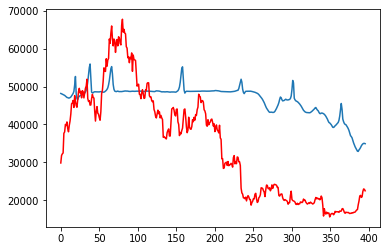

In [44]:
plt.plot(np.arange(0,len(predictions)),predictions)
plt.plot(np.arange(0,len(predictions)),scaler2.inverse_transform(y_test.reshape(-1,1)).flatten(),color="red")

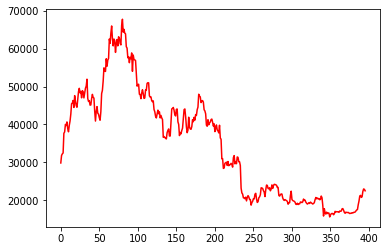

In [43]:
plt.plot(np.arange(0,len(predictions)),scaler2.inverse_transform(y_test.reshape(-1,1)).flatten(),color="red")